      x    y
0    40   64
1    42   66
2    44   60
3    46   70
4    50   52
5    52   55
6    52   60
7    54   42
8    56   40
9    58   30
10   60   69
11   62   65
12   66   28
13   64   43
14   66   78
15   55   57
16   49   49
17   50   55
18   59   51
19   58   54
20   44   53
21   46   47
22   49   46
23   56   57
24   57   61
25   53   49
26   57   71
27   45   67
28   38   67
29   68   38
30   77   69
31   87   56
32   56   85
33   55   39
34   97   79
35   39   56
36   68   47
37   90  103
38  110  101
39   19   19


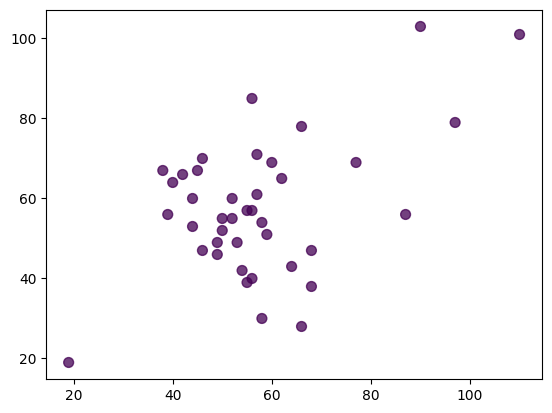

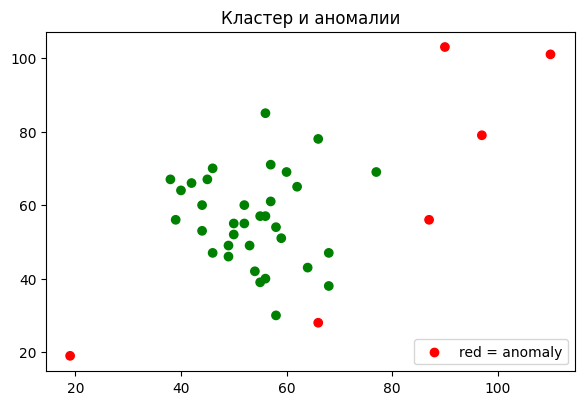

In [3]:
#Выгрузка библиотек
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from scipy import stats


#Координаты точек
data = {'x':[40,42,44,46,50,52,52,54,56,58,60,62,66,64,
             66,55,49,50,59,58,44,46,49,56,57,53,57,45,
             38,68,77,87,56,55,97,39,68,90,110,19],
        'y':[64,66,60,70,52,55,60,42,40,30,69,65,28,43,
             78,57,49,55,51,54,53,47,46,57,61,49,71,67,
             67,38,69,56,85,39,79,56,47,103,101,19]
        }
df = DataFrame(data, columns = ['x','y'])
print(df)

model = KMeans(n_clusters= 1,max_iter= 500)
model.fit(df)

plt.scatter(df['x'], df['y'], c = model.labels_.astype(int),s = 50, alpha=0.75)
labels = list(dict.fromkeys(model.labels_))

#Определение аномалий
X = df
fig = plt.figure(figsize=(15,15))

def plot_model(lables, alg_name, plot_index):
    plt.figure(plot_index)
    ax = fig.add_subplot(3,2,plot_index)
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(X.iloc[:,0], X.iloc[:,1], color=colors, marker='o', label='red = anomaly')
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    if leg is not None and leg.legend_handles:
        leg.legend_handles[0].set_color('red')
    ax.set_title(alg_name)

outliers_fraction = 0.05
model = IsolationForest().fit(X)
scores_pred = model.decision_function(X)
threshold = stats.scoreatpercentile(scores_pred, 300 * outliers_fraction)

labels = [('anomaly' if x<threshold else 'normal') for x in scores_pred]
plot_model(labels, 'Isolation Forest', 2)

plt.title ('Кластер и аномалии')
plt.show()